# Практическая работа №9

## Пример 1

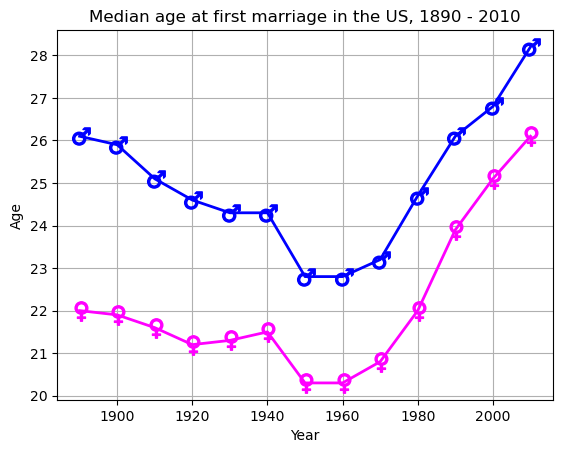

In [3]:
import numpy as np
import matplotlib.pyplot as plt

year, age_m, age_f = np.loadtxt('pr9/eg7-marriage-ages.txt', unpack=True,skiprows=3)
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot ages with male or female symbols as markers
ax.plot(year, age_m, marker='$\u2642$', markersize=14, c='blue', lw=2,
        mfc='blue', mec='blue')
ax.plot(year, age_f, marker='$\u2640$', markersize=14, c='magenta', lw=2,
        mfc='magenta', mec='magenta')
ax.grid()

ax.set_xlabel('Year')
ax.set_ylabel('Age')
ax.set_title('Median age at first marriage in the US, 1890 - 2010')

plt.show()

## Пример 2

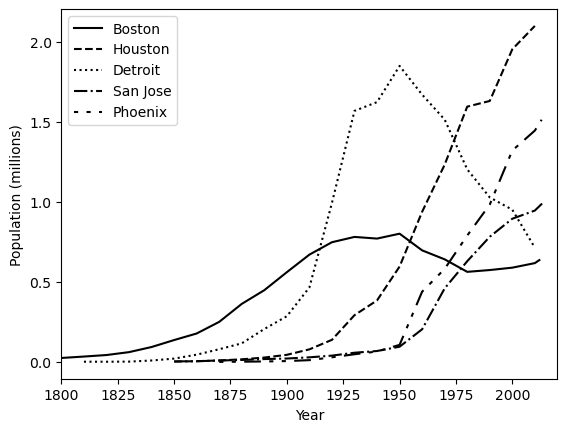

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cities = ['Boston', 'Houston', 'Detroit', 'San Jose', 'Phoenix']
# line styles: solid, dashes, dots, dash-dots, and dot-dot-dash
linestyles = [{'ls': '-'}, {'ls': '--'}, {'ls': ':'}, {'ls': '-.'},
              {'dashes': [2, 4, 2, 4, 8, 4]}]
for i, city in enumerate(cities):
    cityfile = format(city.lower()).replace(' ', '_')
    filename = f'pr9/us-city-populations/{cityfile}.tsv'
    yr, pop = np.loadtxt(filename, unpack=True)
    line, = ax.plot(yr, pop/1.e6, label=city, color='k', **linestyles[i])
ax.legend(loc='upper left')
ax.set_xlim(1800, 2020)
ax.set_xlabel('Year')
ax.set_ylabel('Population (millions)')
plt.show()

## Пример 3

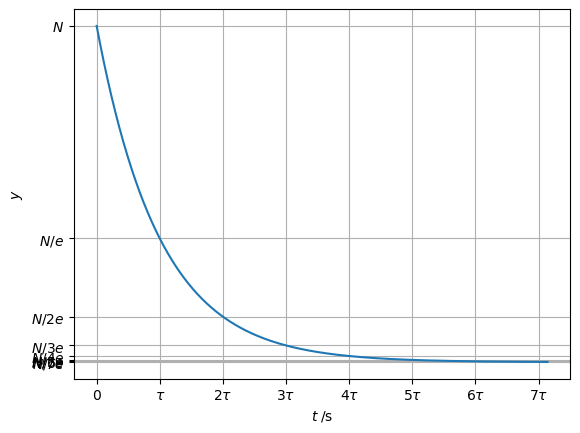

<Figure size 640x480 with 0 Axes>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Initial value of y at t=0, lifetime in s
N, tau = 10000, 28
# Maximum time to consider (s)
tmax = 200
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 1000)
y = N * np.exp(-t/tau)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, y)

# The number of lifetimes that fall within the plotted time interval
ntau = tmax // tau + 1
# xticks at 0, tau, 2*tau, ..., ntau*tau; yticks at the corresponding y-values
xticks = [i*tau for i in range(ntau)]
yticks = [N * np.exp(-i) for i in range(ntau)]
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# xtick labels: 0, tau, 2tau, ...
xtick_labels = [r'$0$', r'$\tau$'] + [r'${}\tau$'.format(k) for k in range(2,ntau)]
ax.set_xticklabels(xtick_labels)
# corresponding ytick labels: N, N/e, N/2e, ...
ytick_labels = [r'$N$',r'$N/e$'] + [r'$N/{}e$'.format(k) for k in range(2,ntau)]
ax.set_yticklabels(ytick_labels)

ax.set_xlabel(r'$t\;/\mathrm{s}$')
ax.set_ylabel(r'$y$')
ax.grid()
plt.show()
plt.draw()
fig.savefig('Lifetimes of an exponential decay.png', dpi=500)

## Пример 4

Измените функцию. Метод np.tile создает массив, повторяя содержимое заданного массива nrep раз. Для построения графика другой периодической функции выберите здесь 'half-sawtooth' или 'sawtooth'

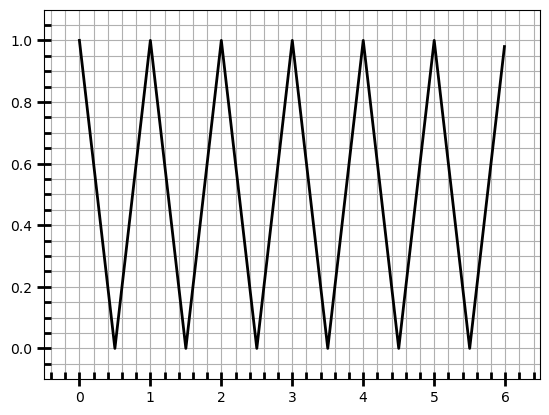

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# A selection of functions on rn abcissa points for 0 <= x < 1
rn = 100
rx = np.linspace(0, 1, rn, endpoint=False)

def tophat(rx):
    """ Top hat function: y = 1 for x < 0.5, y=0 for x >= 0.5 """
    ry = np.ones(rn)
    ry[rx>=0.5]=0
    return ry

# A dictionary of functions to choose from
ry = {'half-sawtooth': lambda rx: rx.copy(),
      'top-hat': tophat,
      'sawtooth': lambda rx: 2 * np.abs(rx-0.5)}

# Repeat the chosen function nrep times
nrep = 6
x = np.linspace(0, nrep, nrep*rn, endpoint=False)
y = np.tile(ry['sawtooth'](rx), nrep)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, 'k', lw=2)
# Add a bit of padding around the plotted line to aid visualization
ax.set_ylim(-0.1,1.1)
ax.set_xlim(x[0]-0.5, x[-1]+0.5)
# Customize the tick marks and turn the grid on
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.grid(which='both')
plt.show()